1.Importing the Packages

In [1]:
#Importing Necessary Packages
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
#To read the CSV File
data = pd.read_csv('codon_usage.csv',low_memory=False)

2.Preprocessing of Data

In [3]:
#To display the First Five Rows
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [4]:
#Information about the Data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

<AxesSubplot: >

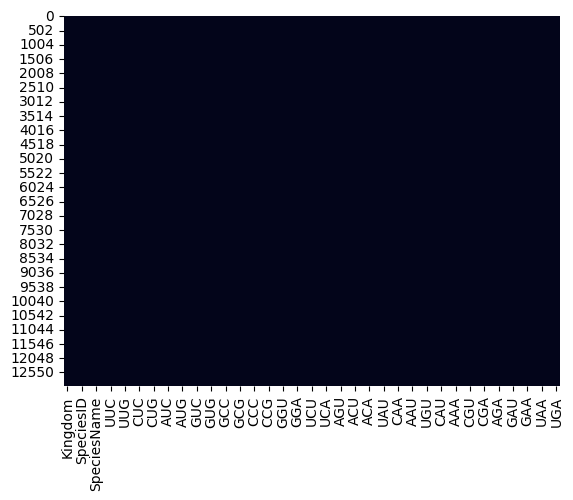

In [5]:
#Checking for Null Values
sns.heatmap(data.isnull(), cbar=False)

In [6]:
#Description of Data
data.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [7]:
#To Display the Maximium Rows
pd.set_option('display.max_rows', 50000)

In [8]:
#To Display Unique Values
data.nunique()

Kingdom           11
DNAtype           11
SpeciesID      12368
Ncodons         7103
SpeciesName    13016
UUU             4791
UUC             4121
UUA             4796
UUG             3282
CUU             3677
CUC             4389
CUA             4063
CUG             4562
AUU             5243
AUC             4684
AUA             4477
AUG             3237
GUU             3640
GUC             3602
GUA             3149
GUG             3993
GCU             3725
GCC             5044
GCA             3451
GCG             3559
CCU             2751
CCC             3221
CCA             3488
CCG             2889
UGG             2597
GGU             3622
GGC             4392
GGA             3538
GGG             2613
UCU             3273
UCC             2997
UCA             3391
UCG             2306
AGU             2440
AGC             2565
ACU             3253
ACC             4188
ACA             4170
ACG             2484
UAU             3977
UAC             3003
CAA             3670
CAG          

In [9]:
#To Replace
data['Kingdom'].replace({'bct':'Bacteria' , 'inv' : "Invertebrates" , 'mam' : 'mammals' , 
                         'pln' : "plant", "pri" : 'primates', 'rod':'rodents' , 'vrt': 'vertebrates', 
                         'vrl' : 'virus', 'phg':'bacyeriophage','arc':'archae','plm':'plasmid'},inplace=True)

In [10]:
#Count of Unique Values
data['Kingdom'].value_counts()

Bacteria         2920
virus            2832
plant            2523
vertebrates      2077
Invertebrates    1345
mammals           572
bacyeriophage     220
rodents           215
primates          180
archae            126
plasmid            18
Name: Kingdom, dtype: int64

3.Transformation of Data

In [11]:
#To Change the Datatype
data['UUU']=data['UUU'].replace(['non-B hepatitis virus','12;I'],'NaN')
data['UUC']=data['UUC'].replace('-','NaN')
data['UUU'] = data['UUU'].astype('float32')
data['UUC'] = data['UUC'].astype('float32')
data.dropna(inplace=True)

In [ ]:
#To Display the Dataframe
data

In [ ]:
#To Split the Dataset
x = data.drop(columns = ['Kingdom','SpeciesName','SpeciesID'], axis = 1 )
y = data['Kingdom']


In [ ]:
#Shape of X and Y
print("The shape of X is " , x.shape)
print("The shape of Y is " , y.shape)

In [ ]:
#Value Counts of Target Variable
y.value_counts()

4.Preparation of Model

In [ ]:
#Data Splitted as Training and Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
#Shape of the Data
print("Shape of Test Data is", x_test.shape)

In [ ]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

dtc_acc_train = accuracy_score(y_train, dtc.predict(x_train))*100
dtc_acc_test = accuracy_score(y_test, y_pred)*100

print("Accuracy of Train Data is", dtc_acc_train)
print("Accuracy of Test Data is", dtc_acc_test)


In [ ]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

rfc_acc_train = accuracy_score(y_train, rfc.predict(x_train))*100
rfc_acc_test = accuracy_score(y_test, y_pred)*100

print("Accuracy of Train Data is", rfc_acc_train)
print("Accuracy of Test Data is", rfc_acc_test)


In [ ]:
#Comparison of Accuracy of Models Used
acc_values = [dtc_acc_test, rfc_acc_test]

labels = ['Decision Tree', 'Random Forest']

plt.bar(labels, acc_values)
plt.title('Accuracy Comparison of Test Datasets')
plt.xlabel('Model')
plt.ylabel('Accuracy')


5.Serialization of Objects

In [ ]:
pickle.dump(rfc, open("model.pkl", 'wb'))

In [ ]:
model=pickle.load(open("model.pkl", 'rb'))

6.Result Obtained

In [ ]:
#Obtain the Result
result=pd.DataFrame(model.predict(x_test))

In [ ]:
#Copy the Result to CSV
result.to_csv("result.csv")